In [103]:
# ihkaraman 2019-09-09

### info about columns
bad: binary, 1: if applicant didnt paid loan, 0: if app. paid    
loan: int, amount of loan request    
mortdue: int, amount due on existing loan   
value: int, value of current property    
reason: DebtCon: debt consolidation, HomeImp: home improvement   
job: occupational categories    
yoj: yars at present job   
derog: number of bad reports         
delinq: number of delinquent credit lines   
clage: age of oldest credit line in months     
ninq: number of recent credit inquiries    
clno: number of credit lines    
debtinc: debt to income ratio   

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from matplotlib.pyplot import plot
import pylab
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import shapiro

In [2]:
data = pd.read_csv("hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [18]:
# there are some nulls in our data, we need to clean nulls
data.dropna(inplace=True)

In [22]:
def ageCat(isbad):
    if isbad == 1:
        return 'bad'
    elif isbad == 0:
        return 'good'
    else:
        return None        

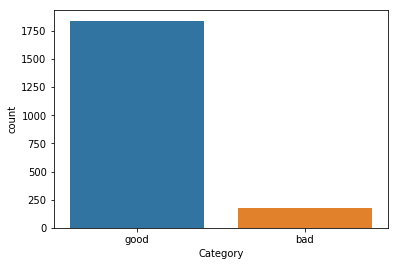

In [31]:
# adding new columns for good bad
data['Category'] = data['bad'].apply(ageCat)
fig = sns.countplot(data['Category'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B009E8F28>,
      dtype=object)

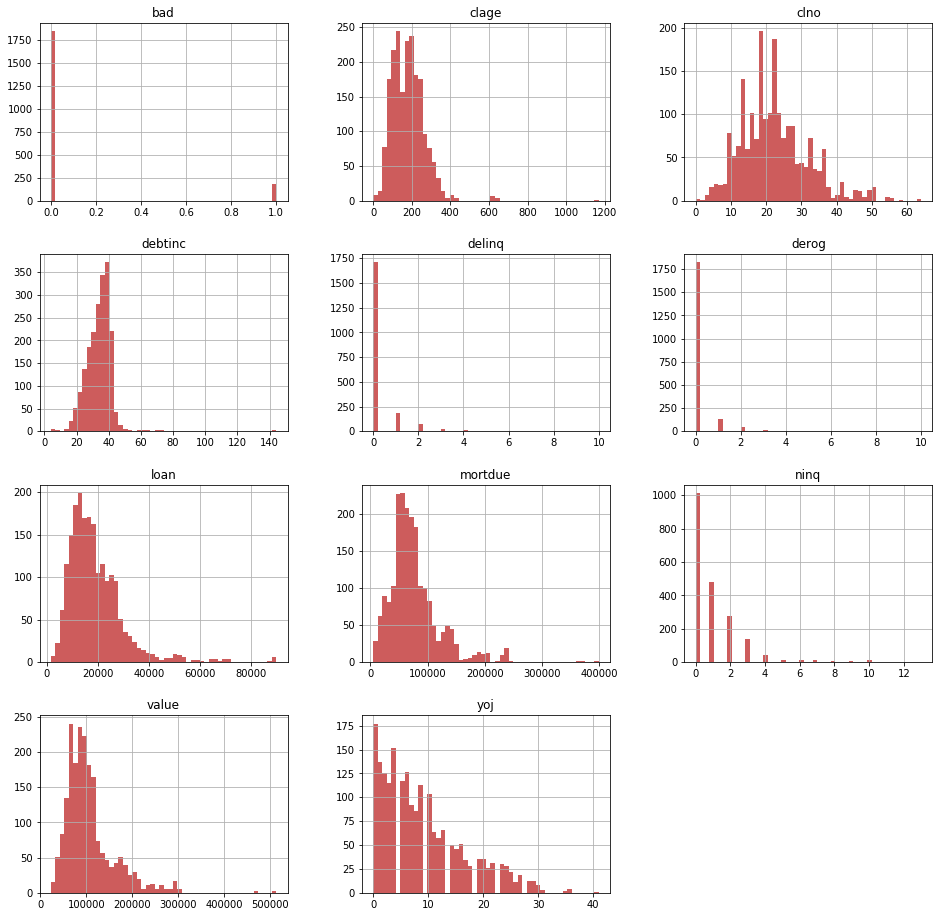

In [43]:
# plotting histograms to see the distributions of the data
data.hist(bins = 50,figsize = (16,16), color = 'indianred')

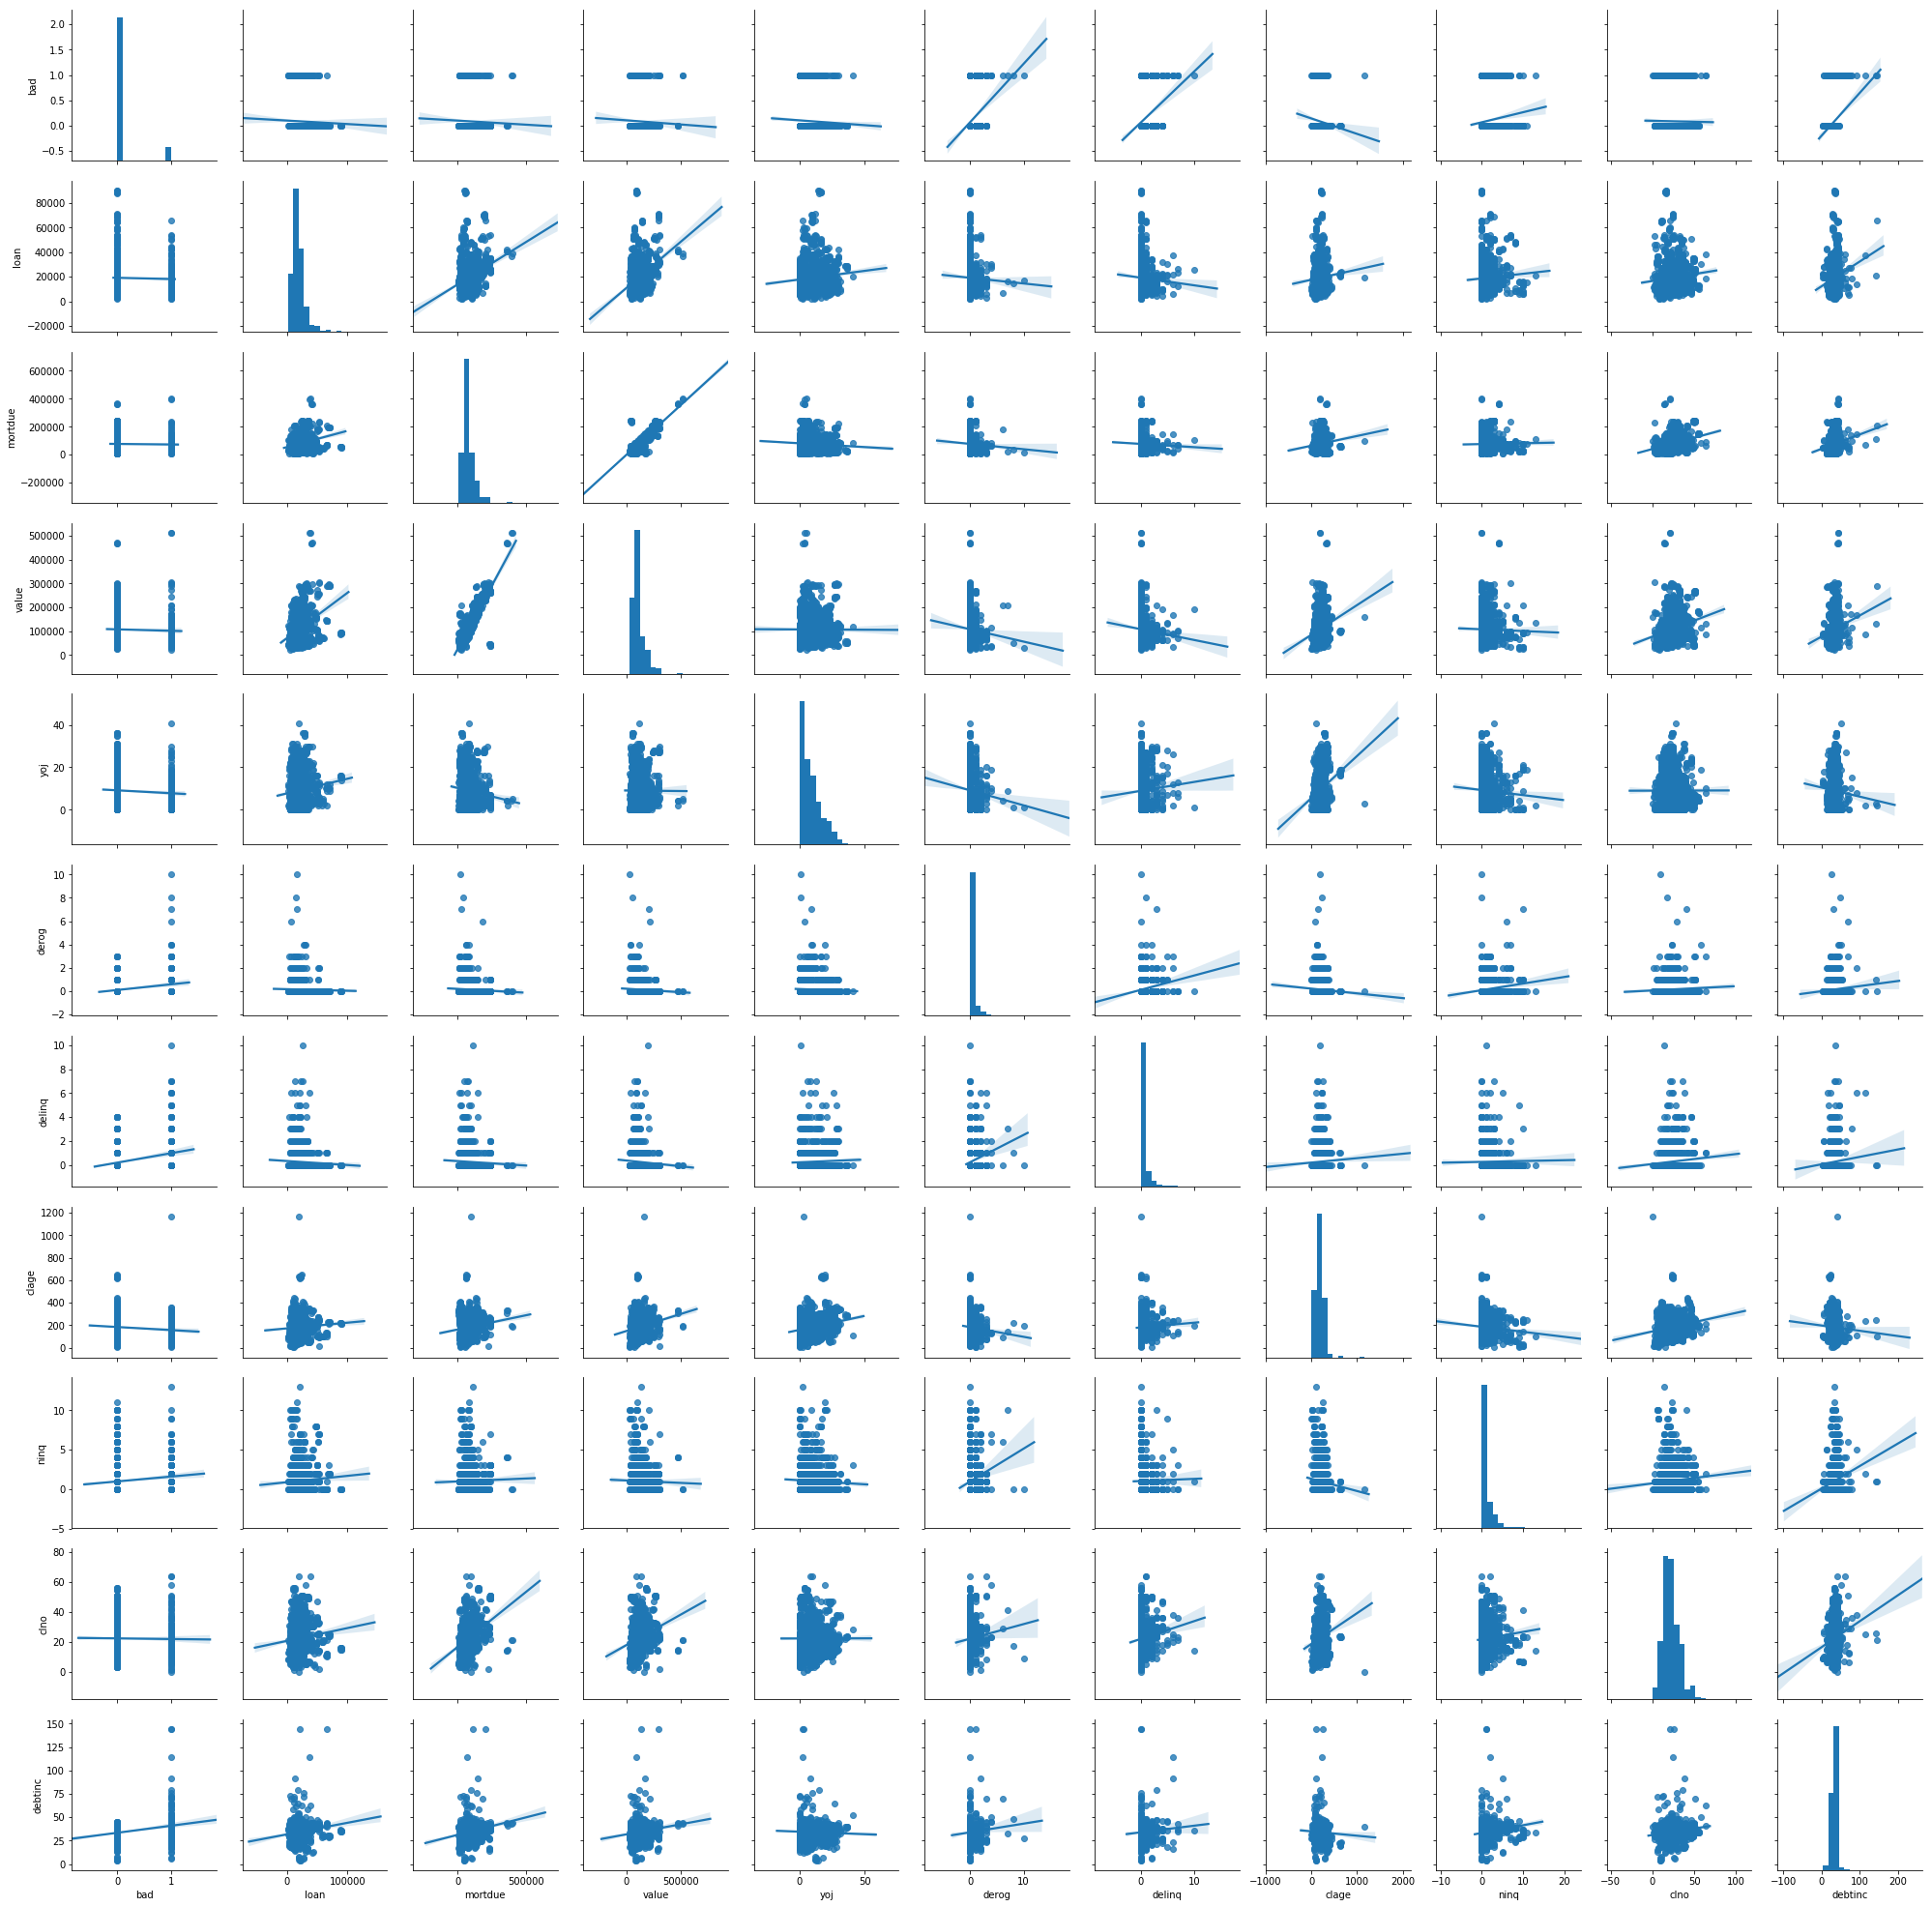

In [45]:
# pair graphs for data
sns.pairplot(data, kind="reg")

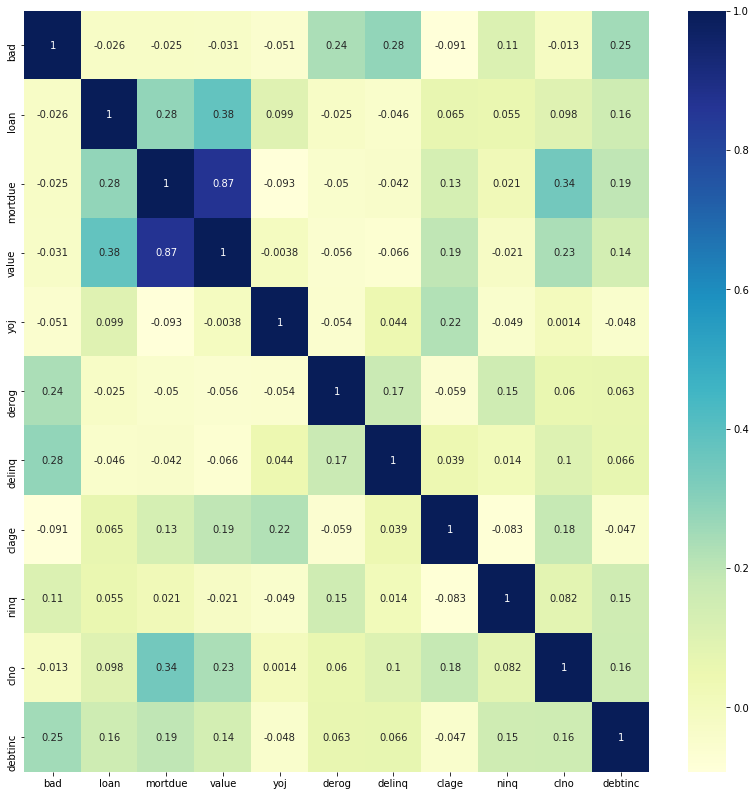

In [61]:
# heatmap for correlations
corr = data.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True,cmap="YlGnBu")
# (value, mortdue) pair seems correlated

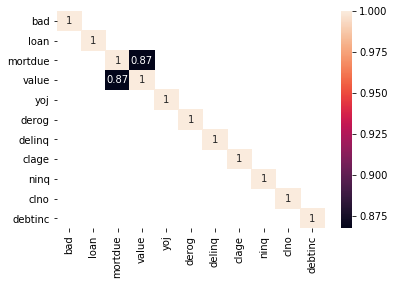

In [64]:
# listing negative or positive correlations greater than 0.5
sns.heatmap(corr[corr.abs()>0.5], annot = True)
# (value, mortdue) pair seems correlated same as pairplot

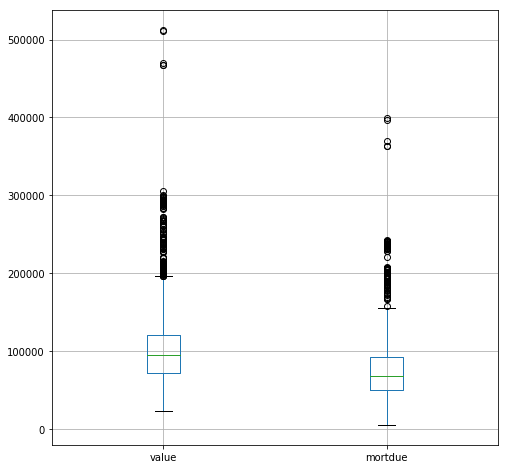

In [96]:
data[['value', 'mortdue']].boxplot(figsize = (8,8))

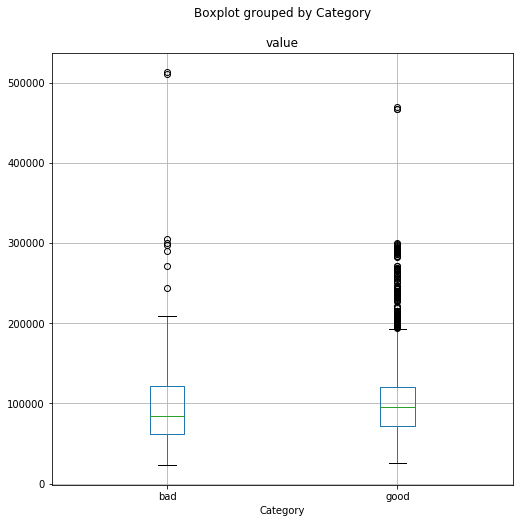

In [99]:
data.boxplot(column = 'value', by = 'Category', figsize = (8,8))
# excessive amount of outliers exist for good 

In [100]:
# shapiro test for 'value' column
stat1, p1 = shapiro (data['value'])
print('stat:',stat1,'p:',p1)
alpha=0.05
if p1 >alpha:
    print('Fail to reject: Data distributed normally')  
else:
    print('Reject: Data doesn\'t distribute normally')

stat: 0.8436811566352844 p: 1.0142738414629458e-40
Reject: Data doesn't distribute normally


In [92]:
# shapiro test for 'mortdue' column
stat2, p2 = shapiro (data['mortdue'])
print('stat:',stat2,'p:',p2)
alpha=0.05
if p2 >alpha:
    print('Fail to reject: Data distributed normally')  
else:
    print('Reject: Data doesn\'t distribute normally')

stat: 0.8624268174171448 p: 7.460412130575895e-39
Reject: Data doesn't distribute normally


In [94]:
stat3, p3 = stats.levene(data['value'], data['mortdue'])
alpha = 0.05
print('stat:',stat3,'p:',p3)
if p > alpha:
    print("Fail to recejt: Constant variance")
else:
    print("Reject! Inconstant variance")

stat: 27.166309046206063 p: 1.960277648170479e-07
Reject! Inconstant variance


- data doesn't come from normal distribution so we need to collect more data. 
- or we can assume that our data is sufficient and continue to our analysis